In [ ]:
import streamlit as st

# Add a file uploader widget to the app
# uploaded_file = st.file_uploader("Choose a file", type=['txt'])
# file is txt file


uploaded_file = open('test1.txt', 'r', encoding='utf-8')
 
# # Check if a file was uploaded
# if uploaded_file is not None:
#     # Read the file as bytes
#     bytes_data = uploaded_file.getvalue()
#     # Decode the bytes to a string
#     chat_data = bytes_data.decode('utf-8')
#     # Perform the necessary processing on the chat data
#     # processed_data = process_chat_data(chat_data)
#     # Display the processed data in the app
#     # st.write(processed_data)

# uploaded_file = open('test1.txt')
uploaded_file = uploaded_file.readlines()
 
uploaded_file

In [145]:
import pandas as pd
import re

def process_chat_data(chat_data):
    
    # Initialize empty lists to store the data
    dates = []
    senders = []
    messages = []
    
    # Iterate through each line of the chat data
    for line in chat_data:
        # Use regular expressions to extract the date and time, sender, and message
        pattern =  r'(\d+/\d+/\d+, \d+:\d+ [AP]M) - ([^:]+): (.*)'

        # Test the regular expression
        match = re.match(pattern, line)
        # print(match)

        if match:
            date_time = match.group(1)
            sender = match.group(2)
            message = match.group(3)
            # print(date_time, sender, message)
            dates.append(date_time)
            senders.append(sender)
            messages.append(message)
    
    # Create a dataframe from the lists
    df = pd.DataFrame({'Date & Time': dates, 'Sender': senders, 'Message': messages})
    return df


df=process_chat_data(uploaded_file)


In [146]:
df

,Date & Time,Sender,Message
0,"10/7/22, 3:14 PM",Aastha Allen,Kem
1,"10/7/22, 3:31 PM",Akshat Cycling,Aakho video
2,"10/7/22, 3:31 PM",Akshat Cycling,Na record karva didho
3,"10/7/22, 3:31 PM",Devasy,Kone
4,"10/7/22, 3:32 PM",Akshat Cycling,@919712633410 aa
...,...,...,...
8215,"12/27/22, 9:44 AM",Avinash College,Congratulations 👏🎉
8216,"12/27/22, 9:45 AM",Mihir Dave,Congratulations 🥳🎊🎊
8217,"12/27/22, 9:45 AM",Aastha Allen,Congratulations 🎊
8218,"12/27/22, 11:11 AM",Devasy,Superb


In [147]:
# convert date and time to date without seconds
df['Date & Time'] = pd.to_datetime(df['Date & Time'])
df

,Date & Time,Sender,Message
0,2022-10-07 15:14:00,Aastha Allen,Kem
1,2022-10-07 15:31:00,Akshat Cycling,Aakho video
2,2022-10-07 15:31:00,Akshat Cycling,Na record karva didho
3,2022-10-07 15:31:00,Devasy,Kone
4,2022-10-07 15:32:00,Akshat Cycling,@919712633410 aa
...,...,...,...
8215,2022-12-27 09:44:00,Avinash College,Congratulations 👏🎉
8216,2022-12-27 09:45:00,Mihir Dave,Congratulations 🥳🎊🎊
8217,2022-12-27 09:45:00,Aastha Allen,Congratulations 🎊
8218,2022-12-27 11:11:00,Devasy,Superb


In [156]:
from sklearn.cluster import DBSCAN
import numpy as np
# remove seconds from date and time
# separate date and time
# convert date and time to date without seconds
# df['Date & Time'] = pd.to_datetime(df['Date & Time'])
df['Date'] = df['Date & Time'].dt.date
# time without seconds

df['Time'] = df['Date & Time'].dt.time
df['Time'] = df['Time'].apply(lambda x: x.hour * 60 + x.minute)
reference_date = pd.to_datetime('1/1/2020').date()

# Convert the 'Date' column to integers representing the number of days since the reference date
df['Date'] = df['Date'].apply(lambda x: (reference_date - x).days)
df['Trivial Time'] = df['Date'] * 24 * 60 + df['Time']

X = df[['Trivial Time']]
clustering = DBSCAN(eps=50, min_samples=25).fit(X, y=None, sample_weight=None)
df['Cluster'] = clustering.labels_


In [157]:
df['Cluster'].value_counts()
# print cluster 2
        # print(df[df['Cluster']==i])

-1     3108
 0      252
 46     219
 22     188
 18     174
       ... 
 13      26
 2       26
 76      25
 27      25
 28      25
Name: Cluster, Length: 87, dtype: int64

In [158]:
df[df['Cluster']==0]['Message']

26                                       <Media omitted>
27                        Aa aayushi che @919913849046 ?
28                                         blue vali haa
29                                                 Sassy
30                                               Somaiya
                             ...                        
273                                                  Haa
274    Tara mate nai akshat mate karelo best of luck ...
275                                                   ok
276                      Etle join karis to na nai padye
277                     @917016600453 tane SVM aavde che
Name: Message, Length: 252, dtype: object

In [159]:
df1=df.copy()
# df1.drop(df1[df1['Cluster'] == -1].index, inplace = True)
# drop columns from df1
df1.drop(['Date & Time', 'Date', 'Time', 'Trivial Time'], axis=1, inplace=True)
df1

,Sender,Message,Cluster
0,Aastha Allen,Kem,-1
1,Akshat Cycling,Aakho video,-1
2,Akshat Cycling,Na record karva didho,-1
3,Devasy,Kone,-1
4,Akshat Cycling,@919712633410 aa,-1
...,...,...,...
8215,Avinash College,Congratulations 👏🎉,-1
8216,Mihir Dave,Congratulations 🥳🎊🎊,-1
8217,Aastha Allen,Congratulations 🎊,-1
8218,Devasy,Superb,-1


In [168]:
#  now we have to find the most active users in each cluster
#  we will use the sender column
#  we will use the cluster column

#  we will use the groupby function
#  we will use the count function
 
#  we will use the sort_values function
#  we will use the reset_index function
 
 
# remove the cluster -1
df1.drop(df1[df1['Cluster'] == -1].index, inplace = True)

# top 3 most active users in each cluster
most_active = []
for i in range(df1['Cluster'].nunique()):
    most_active.append(df1[df1['Cluster']==i].groupby('Sender').count().sort_values(by='Message', ascending=False).reset_index().head(3))

# for i in range(df1['Cluster'].nunique()):
    # most_active.append()
    
# most_active kj
print(".")

.


In [180]:
# top 3 most active users in top 3 clusters with the most messages
best_clusters = df1.groupby('Cluster').count().sort_values(by='Message', ascending=False).reset_index().head(3)

# calculate the top 3 most active users in best clusters
best_clusters_active = []
for i in range(best_clusters['Cluster'].nunique()):
    best_clusters_active.append(df1[df1['Cluster']==best_clusters['Cluster'][i]].groupby('Sender').count().sort_values(by='Message', ascending=False).reset_index().head(3))
    
best_clusters_active[0].shape

(3, 3)

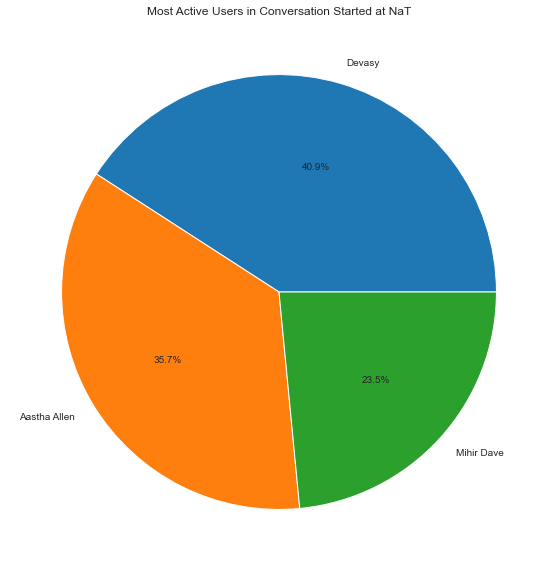

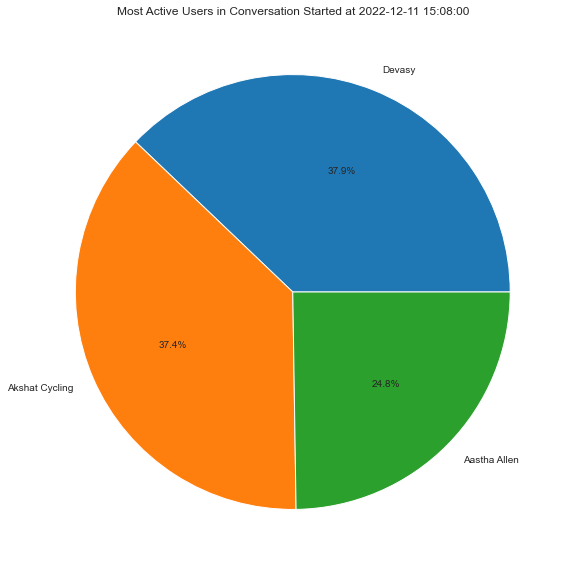

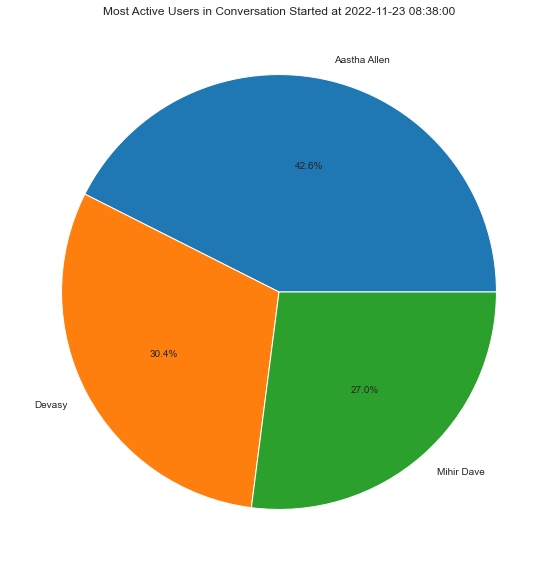

In [186]:
# visualize the clusters via pie chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# plt.figure(figsize=(10, 10))
# plt.pie(df1['Cluster'].value_counts(), labels=df1['Cluster'].value_counts().index, autopct='%1.1f%%')
# plt.title('Clusters')
# plt.show()

# visualize the best clusters active users via pie chart
for xyz in best_clusters_active:
    plt.figure(figsize=(10, 10))
    plt.pie(xyz['Message'], labels=xyz['Sender'], autopct='%1.1f%%')
    clusternumber = xyz['Cluster'][0]
    # get date and time of first message in cluster
    time = df[df['Cluster']==clusternumber]['Date & Time'].min()
    plt.title('Most Active Users in Conversation Started at ' + str(time))
    plt.show()
     
    
    
    
 


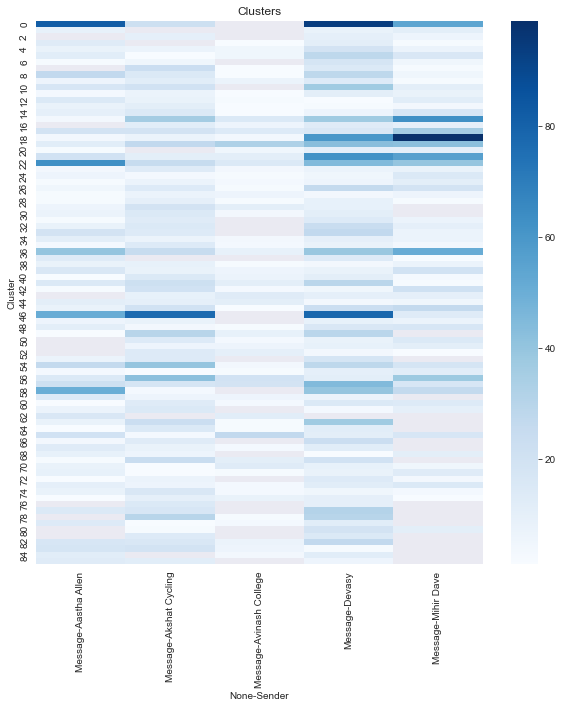

In [189]:
# visualize the heatmap of the clusters
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(df1.groupby(['Cluster', 'Sender']).count().unstack(), cmap='Blues')
plt.title('Clusters')
plt.show()

    

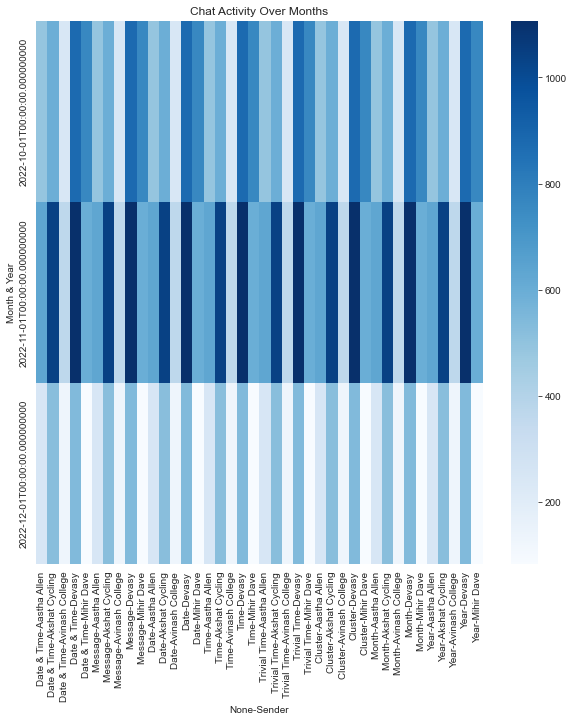

In [190]:
# heatmap of chat activity over months
df['Date & Time'] = pd.to_datetime(df['Date & Time'])
df['Month'] = df['Date & Time'].dt.month
df['Year'] = df['Date & Time'].dt.year
df['Month & Year'] = df['Month'].astype(str) + '/' + df['Year'].astype(str)
df['Month & Year'] = pd.to_datetime(df['Month & Year'])
df['Month & Year'] = df['Month & Year'].dt.strftime('%m/%Y')
df['Month & Year'] = pd.to_datetime(df['Month & Year'])
 
# heatmap of chat activity over months
plt.figure(figsize=(10, 10))
sns.heatmap(df.groupby(['Month & Year', 'Sender']).count().unstack(), cmap='Blues')
plt.title('Chat Activity Over Months')
plt.show()
  

TypeError: heatmap() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 720x720 with 0 Axes>